# Project: Wrangling and Analyze Data

## Table of Contents
* [Data Gathering](#DataGathering)
  
* [Assessing Data](#AssessingData)

* [Cleaning Data](#CleaningData)

* [Storing Data](#StoringData)

* [Analyzing and Visualizing Data](#AnalyzingandVisualizingData)


## Data Gathering <a class="anchor" id="DataGathering"></a>


In [1]:
#importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
import json
import seaborn as sns

#### Importing the enhanced Twitter archived file

In [2]:
#gathering the first dataset by downloading the csv file and uploading it on my 
#jupyter workspace

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#to access my first dataset
df_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748699167...,11,10,Tripp,None,None,None,None


#### Downloading the tweet image prediction file using the Requests library

In [4]:
#to download the prediction dataset
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#save the HTML as file
with open('image-predictions.tsv', mode = 'wb') as file:
        file.write(response.content)

In [5]:
#to import the file into my workspace
df_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
#to check the file imported above
df_prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
562,677918531514703872,https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg,1,Eskimo_dog,0.199347,True,dalmatian,0.153225,True,American_Staffordshire_terrier,0.107798,True


#### Using the Tweepy library to query additional data via the Twitter API 

In [7]:
# to convert the txt file into a datalist

df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [8]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [9]:
#to create a dataframe from the df_list above that contains tweet ID, retweet count and favourite count 
tweet_data = pd.DataFrame(df_list, columns =['id', 'retweet_count', 'favorite_count'])

In [10]:
#to check the tweet dataframe
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
#to save df_tweetdata to csv file

tweet_data.to_csv('tweet-data.csv', index = False)

In [12]:
#to read the csv file read above
df_tweetdata = pd.read_csv('tweet-data.csv')
df_tweetdata.sample()

,id,retweet_count,favorite_count
1548,689154315265683456,1128,3348


## Assessing Data <a class="anchor" id="AssessingData"></a>
    
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
#to see the first 5 rows of data in the archive dataframe
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
#to see the first 5 data of data in the prediction dataframe
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
#to see the first 5 data of data in the tweet_data dataframe
df_tweetdata.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [16]:
#to check the info of the associated variable in the archive df
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#to check duplicated tweet_id in the archive df
sum(df_archive['tweet_id'].duplicated())

0

In [18]:
#to describe the archive df
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#to know the number of rating_numerator
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
#to know the number of rating_denominator
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
#to know the datatype of tweet_id in the archive df
type(df_archive.tweet_id[0])

numpy.int64

In [22]:
#to know the dtype of name variable in the archive df
type(df_archive.name[0])

str

In [23]:
#to know the dtype of timestamp variable in the archive df
type(df_archive.timestamp[0])

str

In [24]:
#to find the sum of  missing values in the archive df
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
#to check the info of the associated variable in the prediction df
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#to check the last 5 rows of data in the prediction df
df_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
#to find the number of duplicated tweet_id data in the prediction df
sum(df_prediction['tweet_id'].duplicated())

0

In [28]:
#to see the dtype of the jyp_url variable in the prediction df
type(df_prediction.jpg_url[0])

str

In [29]:
#to check the info of the associated variable in the tweetdata df
df_tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [30]:
#to find the number of duplicated tweet_id data in the prediction df
sum(df_tweetdata['id'].duplicated())

0

### Quality issues

#### Archive table

1. Only the tweets are needed, so the retweet columns can be dropped 

2. The name column contains none instead of null

3. timestamp datatype should be changed from string "str" to datetime

4. tweet_id datatype should be string "str" not interger "int"


#### Prediction table

5. The img_num column should be dropped because it is unnecessary 

6. names p columns have some upper letter and some lower letter

7. tweet_id datatype should be string "str" not interger "int"


#### Tweet Data Table

8. The 'id' column name should be changed to 'tweetid' so it matches that of the archive and prediction table

9. tweet_id datatype should be string "str" not interger "int"

### Tidiness issues

#### Archive table
1. doggo, floofer, pupper, and puppo should be in one(1) column not four(4) colmuns

#### Prediction table
2. columns with "conf" should be properly named to confidence for easy understanding


##### Generally, the three dataframes should be combined to form in one dataframe for easy use

## Cleaning Data <a class="anchor" id="CleaningData"></a>


In [31]:
# Make copies of original pieces of data

clean_df_archive = df_archive.copy()
clean_df_prediction = df_prediction.copy()
clean_df_tweetdata = df_tweetdata.copy()

### Cleaning of Quality Issues

### Issue 1:

#### Define: Since only original ratings that have images are needed, drop all retweeted and in_reply columns

#### Code

In [32]:
#to select only the rows that have null values in retweet related columns
clean_df_archive = clean_df_archive[clean_df_archive.retweeted_status_id.isnull()]
clean_df_archive = clean_df_archive[clean_df_archive.retweeted_status_user_id.isnull()]
clean_df_archive = clean_df_archive[clean_df_archive.retweeted_status_timestamp.isnull()]

In [33]:
#to drop all the necessary columns not needed for my anaylsis
clean_df_archive = clean_df_archive.drop(columns=['retweeted_status_id',
                                                  'retweeted_status_user_id', 
                                                  'retweeted_status_timestamp', 
                                                  'in_reply_to_status_id',
                                                  'in_reply_to_user_id'])


#### Test

In [34]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue 2: 

#### Define :  replace  unidentified dog names with  'None' and rename the 'None' in the name column to 'NaN' 

#### Code

In [35]:
# replace the weird names with None

unidentified_dognames = (["a", "all", "an", "by", "his", "just", "my", "not", "such", "the", "this", "very"])
for x in unidentified_dognames:
    clean_df_archive["name"].replace(x, "None", inplace = True)
    
    
    
#to replace none and None names with NaN

null_names = (["none", "None"])

for n in null_names:
    clean_df_archive["name"].replace(n, value= np.nan)



#### Test 1

In [36]:
clean_df_archive.name.isnull().sum()

0

#### Test 2

In [37]:
 clean_df_archive.name.value_counts().head(10)

None       764
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
Name: name, dtype: int64

### Issue 3: 

#### Define : convert timestamp datatype using the to_datetime method 

#### Code

In [38]:
clean_df_archive['timestamp'] = clean_df_archive['timestamp'].astype('datetime64[ns]')

#### Test

In [39]:
type(clean_df_archive.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue 4:

#### Define: tweet_id datatype should be string "str" not interger "int"

#### Code

In [40]:
clean_df_archive.tweet_id = clean_df_archive.tweet_id.astype(str)

#### Test

In [41]:
type(clean_df_archive.tweet_id[0])

str

### Issue 5:

#### Define: The img_num column should be dropped because it is unnecessary

#### Code

In [42]:
clean_df_prediction = clean_df_prediction.drop(columns=['img_num'])

#### Test

In [43]:
clean_df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### Issue 6:

#### Define:  names in  'p' columns have some upper letter and some lower letter

#### Code

In [44]:
#to change the names in the 'p' column using the string.title() method
clean_df_prediction.p1 = clean_df_prediction.p1.str.title()
clean_df_prediction.p2 = clean_df_prediction.p2.str.title()
clean_df_prediction.p3 = clean_df_prediction.p3.str.title()

#### Test

In [45]:
clean_df_prediction.head(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue 7:

#### Define: tweet_id datatype should be string "str" not interger "int"

#### Code

In [46]:
clean_df_prediction.tweet_id = clean_df_prediction.tweet_id.astype(str)

#### Test

In [47]:
type(clean_df_archive.tweet_id[0])

str

### Issue 8:

#### Define: The 'id' column name should be changed to 'tweetid' so it matches that of the archive and prediction table

#### Code

In [48]:
clean_df_tweetdata = clean_df_tweetdata.rename(columns = {'id': 'tweet_id'})


#### Test

In [49]:
clean_df_tweetdata.sample()

,tweet_id,retweet_count,favorite_count
608,797545162159308800,5656,16198


### Issue 9:

#### Define: change tweet_id datatype from string "str" to interger "int"

#### Code

In [50]:
clean_df_tweetdata.tweet_id = clean_df_tweetdata.tweet_id.astype(str)

#### Test

In [51]:
type(clean_df_tweetdata.tweet_id[0])

str

### Cleaning of Tidiness Issues

### Issue 1:

#### Define: create a column for doggo, floofer, pupper, and puppo as they should be in one(1) column not four(4) colmuns

#### Code

In [52]:
#to create a single column for dog nicknames and drop the nicknmes that are in four(4) different columns 
clean_df_archive['dog_stage'] = clean_df_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_df_archive = clean_df_archive.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test 1

In [53]:
#to check the number of dogs per nickname
clean_df_archive['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

#### Test 2

In [54]:
#to see the reflected change above
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             364 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 249.9+ KB


### Issue 2: 

#### Define: columns with "conf" should be properly named to confidence for easy understanding using the *rename* method

#### Code

In [55]:
#to change the way the column name is named 
clean_df_prediction.rename(columns={'p1_conf': 'p1_confident'}, inplace=True)
clean_df_prediction.rename(columns={'p2_conf': 'p2_confident'}, inplace=True)
clean_df_prediction.rename(columns={'p3_conf': 'p3_confident'}, inplace=True)

#### Test

In [56]:
#to verfiy the change above
clean_df_prediction.head(1)

,tweet_id,jpg_url,p1,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True


### *FINAL CLEANING* :  Merging of the three dataframes into a master dataset

In [57]:
# merge the archive, prediction and tweet_data dataframes into one dataframe using the DataFrame.merge()

twitter_archive_master = clean_df_archive.merge(clean_df_prediction, on = 'tweet_id').merge(clean_df_tweetdata, on = 'tweet_id')


In [58]:
#to check a sample of the master dataframe
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,retweet_count,favorite_count
1900,667549055577362432,2015-11-20 03:44:31,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,NaN,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False,2454,6138


In [59]:
#to check info of the associated variables in the master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             326 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_confident          1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_confident          1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_confident          1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-n

## Storing Data <a class="anchor" id="StoringData"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
# to save the master file to_csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [61]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data <a class="anchor" id="AnalyzingandVisualizingData"></a> 

### Insights:

1. Exploration of  data description


2. What is the strenght or nature of relationships between the retweets, favorites and dog predictions p1-p3?


3. Dog-stage ratio(what is the most popular stage and least popular stage​?)


4. What is the success rate of the algorithm predictions?

### Insight 1: Data description exploration

In [62]:
#to explore data description
twitter_archive_master.describe().round(4)

,tweet_id,rating_numerator,rating_denominator,p1_confident,p2_confident,p3_confident,retweet_count,favorite_count
count,1.994000e+03,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000
mean,7.358508e+17,12.2808,10.5321,0.5939,0.1344,0.0602,2766.7533,8895.7257
std,6.747816e+16,41.4977,7.3207,0.2720,0.1007,0.0509,4674.6984,12213.1932
min,6.660209e+17,0.0000,2.0000,0.0443,0.0000,0.0000,16.0000,81.0000
25%,6.758475e+17,10.0000,10.0000,0.3629,0.0539,0.0162,624.7500,1982.0000
50%,7.084748e+17,11.0000,10.0000,0.5876,0.1175,0.0495,1359.5000,4136.0000
75%,7.877873e+17,12.0000,10.0000,0.8463,0.1951,0.0916,3220.0000,11308.0000
max,8.924206e+17,1776.0000,170.0000,1.0000,0.4880,0.2734,79515.0000,132810.0000


#### From the above data description :
It is observed that;

1. The least and highest rating denominator is 2 and 170 respectively, which shows that the WeRateDogs data does not have a uniform rating denominator.

2. From the average value of the retweet count and favorite count, it shows that most tweets have favorites than retweets.

3. p1 confident has the higest average value while p3 confident has the lowest average value.

4. In p1 - p3 confident the maximum value ranges between 0 and 1 because they are probabilistic values.

### Insight 2 : Graphical relationship between the retweets, favorites and dog predictions p1-p3

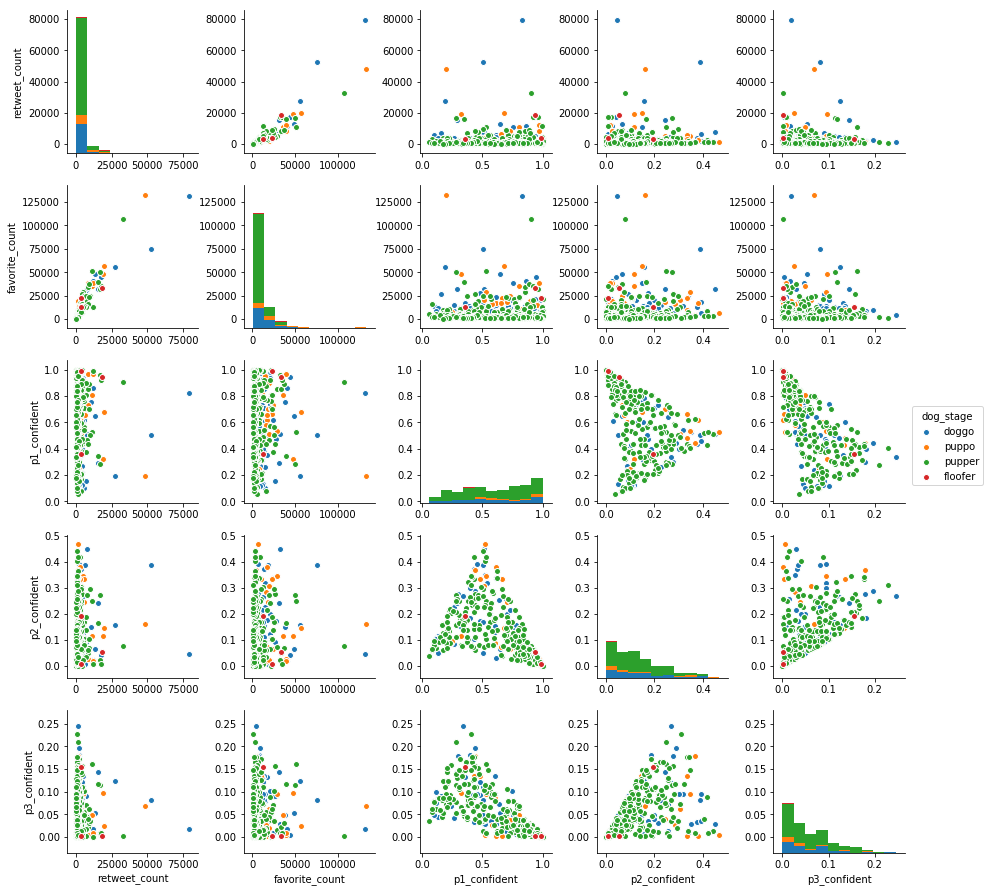

In [63]:
#to show the graphical relation between the variables stated above using the Seaborn pairplot

sns.pairplot(twitter_archive_master, vars=["retweet_count", "favorite_count",
                                           "p1_confident" , "p2_confident", "p3_confident"], hue ="dog_stage");



#### From the above Pairplot :
It is observed that;
1. There is a postive correlation between _retweet count_ and _favorite count_ feature.


2. The pairplot graph of _retweet count_, _favorite count_, _p2 confident_ and _p3 confident_ is right skewed but that of _p1 confident_ is left skewed.


3. __Pupper__ has the highest retweet count and favorite count from the _retweet count_ and _favourite count_ pairplot respectively.


4. The mode of the distribution in the _p1 confident_, _p2 confident_ and  _p3 confident_  pairplot is  **Puppo, Pupper and Puppo** respectively as they have higest peak value in the distribution.

### Insight 3 : Dog-ratio analysis

In [64]:
#to know which dog is the least popular and highest popular stage using value count method
twitter_archive_master.dog_stage.value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

#### Visualization of Dog-ratio analysis

Text(0,0.5,'Value Count')

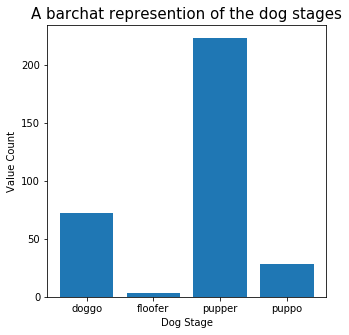

In [65]:
#to know which dog is the least popular and highest popular stage using the barplot

plt.figure(figsize = (5,5))
plt.title("A barchat represention of the dog stages", fontsize = 15)
plt.bar(x = twitter_archive_master['dog_stage'].value_counts().index,
        height = twitter_archive_master.dog_stage.value_counts().values)
plt.xlabel('Dog Stage')
plt.ylabel('Value Count')

#### From the bar chart plot above:
It is observed that according to decreasing order, the *dog stages are*; Pupper, Doggo, Puppo and Floofer. Therefore making 
**Pupper** the most numbered stage and __Floofer__ the least number stage

### Insight 4: What is the success rate of the algorithm predictions?

In [66]:
#to get the values of each dog prediction
print(twitter_archive_master.p1_dog.value_counts())

print(twitter_archive_master.p2_dog.value_counts())

print(twitter_archive_master.p3_dog.value_counts())

True     1477
False     517
Name: p1_dog, dtype: int64
True     1495
False     499
Name: p2_dog, dtype: int64
True     1446
False     548
Name: p3_dog, dtype: int64


#### Visualisation of success rate of the algorithm predictions

74.07221664994985
74.97492477432297
72.51755265797392


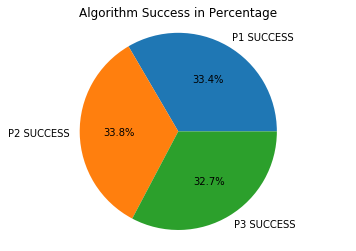

In [67]:
# to calculate the success of each algorithm prediction and multiplying by 100 to find the percentage

p1_success = ((1477/(1477 + 517)) *100)
p2_success = ((1495/(1495 + 499)) *100)
p3_success = ((1446/(1446 + 548)) *100)

print( p1_success)
print( p2_success)
print( p3_success)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['P1 SUCCESS', 'P2 SUCCESS', 'P3 SUCCESS']
sizes =[p1_success , p2_success, p3_success]

fig, ax = plt.subplots()
ax.pie(sizes, labels= labels, autopct = '%1.1f%%')
ax.axis('equal') #equal aspect ratio for a circular piechart
ax.set_title('Algorithm Success in Percentage')

plt.show()


#### From the pie chart above, 
It is observed that the three predictions have relatively close algorithm success-rate yet **p2_dog predicton** is the most successful and **p3_dog prediction*** is the least successful.
The difference between the prediction success is within the range of (33.8% - 33.4%) = 0.4% and (33.8% - 32.7%) = 1.1%.


 ### Conclusions
 
 ##### General Observation :
 
 1. From the data exploration analysis, it is noted that most tweets are liked than retweeted as _retweet count_ has a lower average than _favorite count_ .
 
 
 2. There is a postive correlation between _retweet count_ and _favorite count_ feature.
 
 
 3. In the dog-ratio analysis, *Pupper* the most numbered stage and *Floofer* the least number stage.
 
 
 4. It is observed that the three predictions have relatively close algorithm success-rate with p2_dog predicton is the most successful.

 
 
 ##### Limitation:
 
 1. The unique rating system of WeRateDogs data is an hindrance to carry quality analysis on the dog ratings.
 
 
 2. The dog_stage variable had alot of NaN data that we could not retrieve from another source or separate dataset.
 

### References
1. https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015
2. https://www.kaggle.com/code/mohamedahmed10000/tweets-analysis/notebook#4.0-Analyzing,-and-Visualizing_Data
3. https://www.kaggle.com/code/chidirolex/project-data-wrangling-weratedogs-twitter-archive